# House Price : Advance Regression Techniques

# XGBOOST & LASSO

In [1]:
#Importing Lib

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
temp = train.copy()
data=pd.concat([temp.drop(['SalePrice'],axis=1),test],axis=0) #Drop the SalePrice Colum

In [4]:
data.shape

(2919, 80)

In [5]:
#Check the colum contain null values

def checknans(df):
    nan_col = df.columns[df.isnull().any()].tolist()
    return(df[nan_col].isnull().sum())

In [6]:
checknans(data)

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [7]:
#Fill those column with some value
def fill(col,df,val):
    df.loc[df[col].isnull(),col]=val

In [8]:
fill('Alley',data,'None')
fill('PoolQC',data, 'None')
fill('Fence', data, 'None')
fill('MiscFeature', data, 'None')
fill('FireplaceQu', data, 'None')
fill('Electrical',data,'SBrkr') #Filled NaNs with most frequent value
fill('MSZoning',data,'RL') #Filled NaNs with most frequent value
fill('KitchenQual',data,'TA') #Filled NaNs with most frequent value
fill('Functional',data,'Typ') #Filled NaNs with most frequent value
fill('SaleType',data,'WD') #Filled NaNs with most frequent value
fill('MasVnrType',data,'None')
fill('MasVnrArea',data,0.0)
fill('Utilities',data,'AllPub') #filled with most frequent value


fill('BsmtQual',data,'None')
fill('BsmtFinType1',data,'None')
fill('BsmtFinType2',data,'None')
fill('BsmtCond',data,'None')
fill('BsmtExposure',data,'None')


fill('GarageType',data,'None')
fill('GarageQual',data,'None')
fill('GarageCond',data,'None')
fill('GarageYrBlt',data,'None')
fill('GarageFinish',data,'None')
fill('LowQualFinSF',data,0.0)
fill('BsmtFullBath',data,0.0)
fill('BsmtHalfBath',data,0.0)
fill('HalfBath',data,0.0)
fill('Fireplaces',data,0.0)
fill('EnclosedPorch',data,0.0)
fill('3SsnPorch',data,0.0)
fill('ScreenPorch',data,0.0)
fill('PoolArea',data,0.0)
fill('GarageArea',data,0.0)
fill('GarageCars',data,0.0)
fill('BsmtFinSF2',data,0.0)
fill('Exterior1st',data,0.0)
fill('Exterior2nd',data,0.0)


fill('LotFrontage',data,0.0)
fill('BsmtFinSF1',data,0.0)
fill('BsmtUnfSF',data,0.0)
fill('TotalBsmtSF',data,0.0)
fill('2ndFlrSF',data,0.0)
fill('WoodDeckSF',data,0.0)
fill('OpenPorchSF',data,0.0)
fill('MiscVal',data,0.0)
fill('MoSold',data,0.0)



In [9]:
#Generating Polynomial Features

#The columns which are highly correlated with sale price are generated by polynomial degree 2 & 3
def poly(deg,x):
    return x**deg

col_names = ['OverallQual','GrLivArea','GarageCars','GarageArea']
cnt = 0
#Degree 2
for nm in col_names:
    data[nm +'-deg4'+str(cnt)] = poly(2,data[nm])

#degree 3
for nm in col_names:
    data[nm +'-deg5'+str(cnt)] = poly(3,data[nm])

In [10]:
#Encoding of categorical variables
house_data_encoded=pd.get_dummies(data)

In [11]:
#Normalize data 

#Normalization of data using log(1+x)
Norm_data=np.log1p(house_data_encoded)
Norm_data_true=np.log1p(train.SalePrice)

rows = train.shape[0]


#split into Training set and Test set
Train_data=Norm_data[:rows]
Test_data=Norm_data[rows:]

In [12]:
regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(Train_data, Norm_data_true)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(Test_data)

In [37]:
#Test_data= Test_data.reshape(-1, 1)
from sklearn.linear_model import Lasso

# I found this best alpha through cross-validation.
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(Train_data, Norm_data_true)

# Run prediction on training set to get a rough idea of how well it does.
y_pred_lasso = regr.predict(Test_data)

In [38]:
#from sklearn.ensemble import GradientBoostingRegressor

In [39]:
#model_g = GradientBoostingRegressor()
#clf =model_g.fit(Train_data,Norm_data_true)
#y_pred_GradientB = model_g.predict(Test_data)

In [40]:
#Prediction
Svr_GradientB = (y_pred*0.5 +y_pred_lasso )/1.5
predictions = np.exp(Svr_GradientB)

In [41]:
predictions

array([119363.06415217, 160711.33244139, 178737.56754993, ...,
       168070.2271492 , 113837.61746285, 224594.2968878 ])

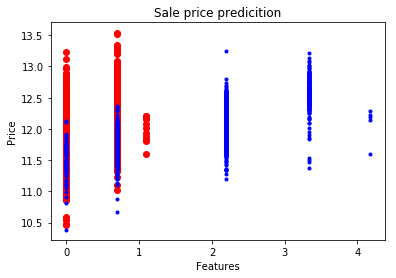

In [45]:
 #Visualising the SVR results (for higher resolution and smoother curve)

#X_grid = np.arange(min(X), max(X+0.1), 0.1) # fOR HIGHER RESOLUTION
#X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(Train_data.iloc[:,20], Norm_data_true,color = 'red')
plt.plot(Train_data.iloc[:,42],regr.predict(Train_data),".",color = 'blue')
plt.title('Sale price predicition')
plt.xlabel('Features')
plt.ylabel('Price')

plt.show()

In [398]:
pd.DataFrame(predictions,columns=['SalePrice']).to_csv('Prediction.csv')